# Perceptron class in sklearn

# 1. Introduction 
- 앞서 만든 Perceptron 클래스가 ```sklearn``` 모듈에서 ```Perceptron``` 클래스로 제공됨
- Perceptron : 이진분류를 위한 알고리즘
- Perceptron 알고리즘은 이미 1958년 Frank Rosenblatt에 의해 고안됨

# 2. Example: Perceptron Class 
- ```sklearn```의 ```Perceptron``` 클래스 사용 예제 

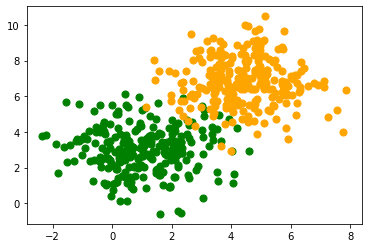

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 샘플 데이터 및 2개 군집 생성
n_samples = 500
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9]), 
                             cluster_std=1.3,
                             random_state=0)
# 군집 시각화
colours = ('green', 'orange')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

In [4]:
# 학습/테스트 데이터 분리 후 퍼셉트론 모델 적용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# 데이터 분리
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

# 퍼셉트론 객체 생성 및 모델 학습
p = Perceptron(random_state=42)
p.fit(train_data, train_labels)

Perceptron(random_state=42)

In [5]:
# 모델 정확도 확인 
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("학습데이터 점수: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("테스트데이터 점수: ", test_score)

학습데이터 점수:  0.9675
테스트데이터 점수:  0.94


In [6]:
p.score(train_data, train_labels)

0.9675

# 3. Classifying the Iris Data with Perceptron Classifier 

In [7]:
import numpy as np
from sklearn.datasets import load_iris

# iris 데이터 불러오기
iris = load_iris()

- Perceptron은 이진분류 모델인데 iris 타깃 라벨은 ['setosa', 'versicolor', 'virginica'] 3종류이므로 'versicolor', 'virginica'를 하나로 합쳐서 binary 변수로 변환 

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
targets = (iris.target==0).astype(np.int8)
print(targets)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [11]:
# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, 
                            targets,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [12]:
# 퍼셉트론 객체 생성 및 모델 학습 
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
p.fit(train_data, train_labels)

Perceptron(max_iter=10, random_state=42)

- 무작위로 선택한 X values에 대해 예측 시행

In [13]:
import random

# 샘플 10개 인덱스
sample = random.sample(range(len(train_data)), 10) 

# 샘플에 대한 예측치
for i in sample:
    print(i, p.predict([train_data[i]]))

38 [0]
65 [0]
8 [0]
71 [0]
115 [1]
47 [0]
69 [1]
98 [1]
56 [1]
42 [0]


In [14]:
# 학습데이터 모델 평가
from sklearn.metrics import classification_report

print(classification_report(p.predict(train_data), train_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [15]:
# 테스트 데이터 모델 평가
from sklearn.metrics import classification_report

print(classification_report(p.predict(test_data), test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

